# Load Data

In [93]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

In [94]:
iris = fetch_openml(name="iris")

In [95]:
X = iris['data']
unique_labels = list(set(iris['target']))
print("the unique labels are",unique_labels)
y = np.array([unique_labels.index(label) for label in iris['target']])

the unique labels are ['Iris-virginica', 'Iris-versicolor', 'Iris-setosa']


In [96]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [97]:
X_train.shape

(120, 4)

# Linear SVM

In [115]:
from models.linear_classifiers import LinearSVM

In [116]:
svm = LinearSVM()

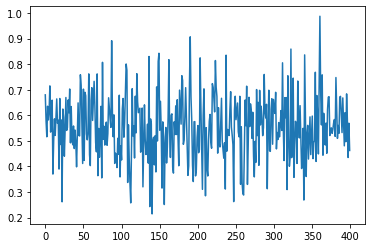

In [103]:
hist = svm.train(X_train,y_train,num_iters = 400, 
                 reg = 1e-3, learning_rate = 1e-3, batch_size = 30)

plt.plot(hist)

In [104]:
y_test_pred = svm.predict(X_test)

In [105]:
print("accuracy of the model is:",np.mean(y_test_pred == y_test))

accuracy of the model is: 0.6333333333333333


In [106]:
y_test == y_test_pred

array([False, False,  True,  True,  True,  True,  True, False,  True,
       False, False, False,  True,  True,  True,  True, False,  True,
        True,  True, False, False,  True,  True,  True,  True, False,
        True,  True, False])

In [107]:
y_test_pred

array([0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 0, 2, 2, 0])

In [108]:
y_test

array([1, 1, 0, 0, 2, 2, 0, 1, 0, 1, 1, 1, 2, 0, 2, 0, 1, 0, 0, 0, 1, 1,
       2, 2, 0, 0, 1, 2, 2, 1])

# Two Layer Neural Net

In [189]:
from models.TwoLayerNet import TwoLayerNet

In [190]:
nn2 = TwoLayerNet(input_size = 4,hidden_size = 4,output_size = 3, std = 1e-3)

In [191]:
nn2.params['W1'][0]

array([ 0.00129789,  0.00060423,  0.00046371, -0.00017021])

In [192]:
histories = nn2.train(X_train,y_train,X_test,y_test,learning_rate=0.15,reg = 1e-4,
                      batch_size=20,num_iters=2000,learning_rate_decay=0.99,verbose=True)

iteration 0 / 2000: loss 1.098614
iteration 100 / 2000: loss 0.668649
iteration 200 / 2000: loss 0.387072
iteration 300 / 2000: loss 0.355472
iteration 400 / 2000: loss 0.359736
iteration 500 / 2000: loss 0.420116
iteration 600 / 2000: loss 0.304838
iteration 700 / 2000: loss 0.321042
iteration 800 / 2000: loss 0.280261
iteration 900 / 2000: loss 0.272825
iteration 1000 / 2000: loss 0.174191
iteration 1100 / 2000: loss 0.290963
iteration 1200 / 2000: loss 0.323402
iteration 1300 / 2000: loss 0.288209
iteration 1400 / 2000: loss 0.294121
iteration 1500 / 2000: loss 0.295697
iteration 1600 / 2000: loss 0.401994
iteration 1700 / 2000: loss 0.325797
iteration 1800 / 2000: loss 0.304544
iteration 1900 / 2000: loss 0.361622


In [193]:
nn2.params['W1'][0]

array([-1.90261221e-02,  1.50827250e-04,  6.18584731e-01, -3.28161273e-02])

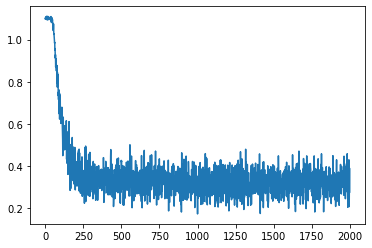

In [194]:
plt.plot(histories['loss_history'])

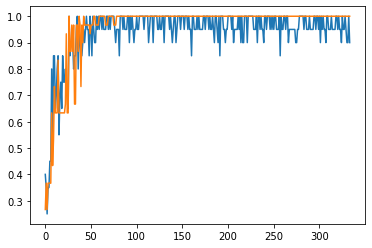

In [196]:
plt.plot(histories['train_acc_history'])
plt.plot(histories['val_acc_history'])